**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pickle
import joblib
from joblib import dump, load
from prettytable import PrettyTable

In [ ]:
!pip install joblib

In [ ]:
d = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonus Project/Dataset.csv')
d

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Checking for null values

In [ ]:
d.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Dropping Null values

In [ ]:
d = d.dropna()
d

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
d.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Creating two columns for Duration in hours and minutes

In [ ]:
d['Duration'] = d['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
duration = list(d['Duration'])
duration_h = []
duration_m = []
for i in range(len(duration)):
  duration_h.append(int(duration[i]/60))
  duration_m.append(int(duration[i]%60))


In [ ]:
d["Duration_hours"] = duration_h
d["Duration_mins"] = duration_m
d.drop(["Duration"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

Creating two separate columns for journey day and month

In [ ]:
d["Journey_day"] = pd.to_datetime(d.Date_of_Journey, format="%d/%m/%Y").dt.day
d["Journey_month"] = pd.to_datetime(d["Date_of_Journey"], format = "%d/%m/%Y").dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creating two separate columns for Departure hour and minute

In [ ]:
d["Dep_hour"] = pd.to_datetime(d["Dep_Time"]).dt.hour
d["Dep_min"] = pd.to_datetime(d["Dep_Time"]).dt.minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creating two separate columns for Arrival hour and minute

In [ ]:
d["Arrival_hour"] = pd.to_datetime(d.Arrival_Time).dt.hour
d["Arrival_min"] = pd.to_datetime(d.Arrival_Time).dt.minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Dropping original columns of whom we created new ones

In [ ]:
d.drop(['Date_of_Journey','Dep_Time','Arrival_Time'], axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
d

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,2,30,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,2,35,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,3,0,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,2,40,1,3,11,30,14,10


In [ ]:
d["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Dropping Additional info

In [ ]:
d.drop(['Additional_Info'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
d["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
d["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
d["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

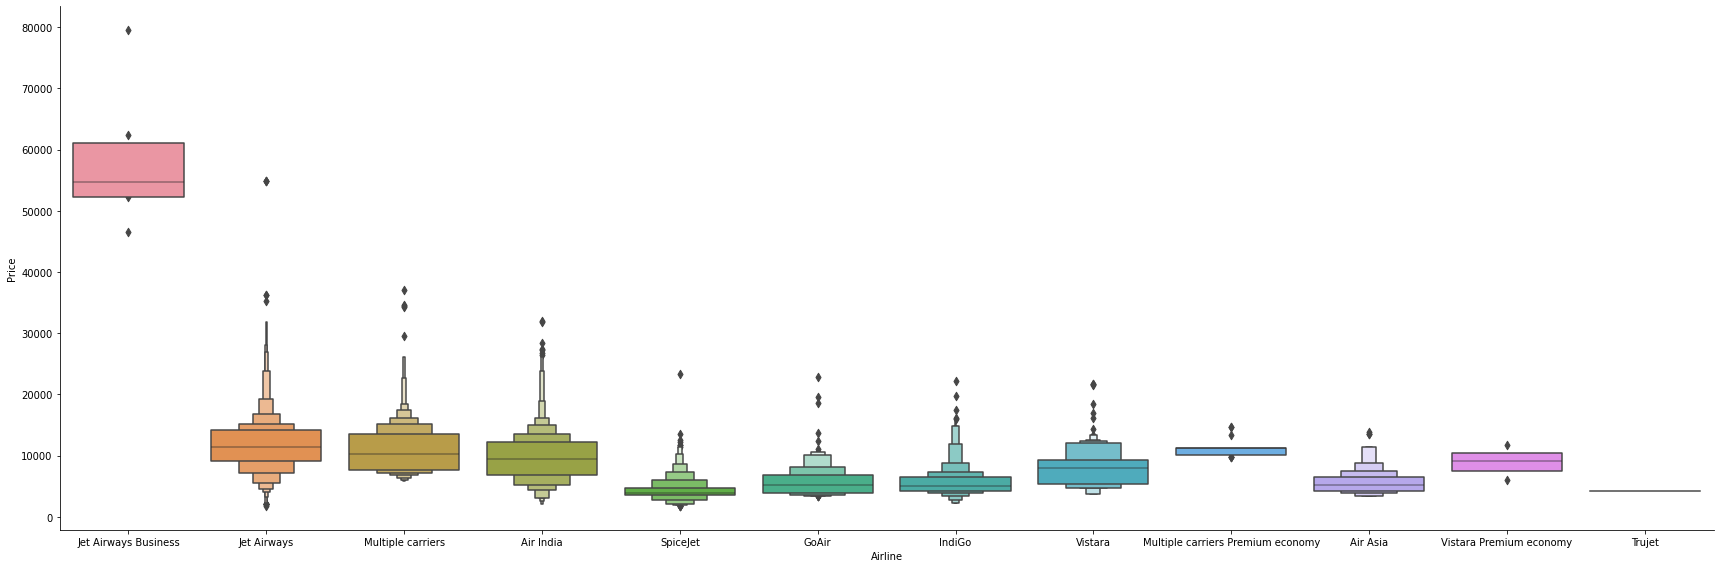

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = d.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

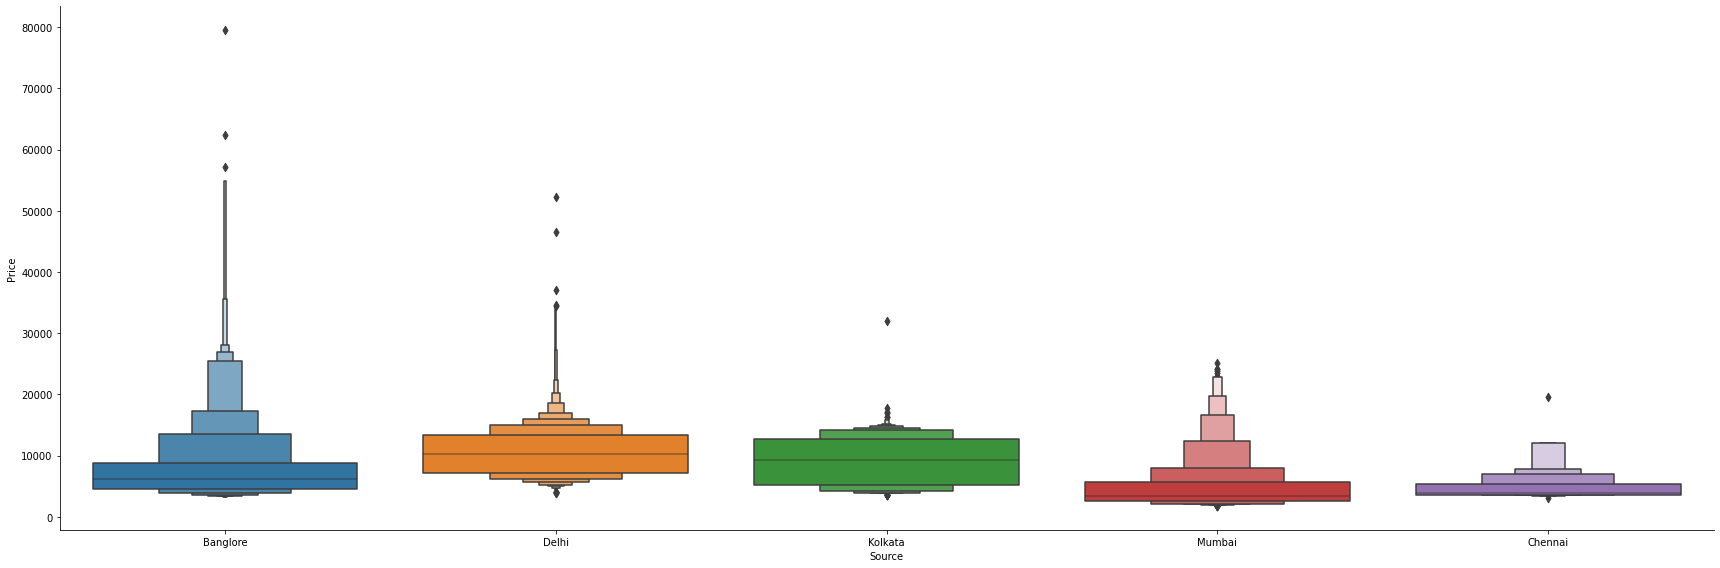

In [ ]:
sns.catplot(y = "Price", x = "Source", data = d.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

We observe Chennai has max outliers, while Bangalore has the least

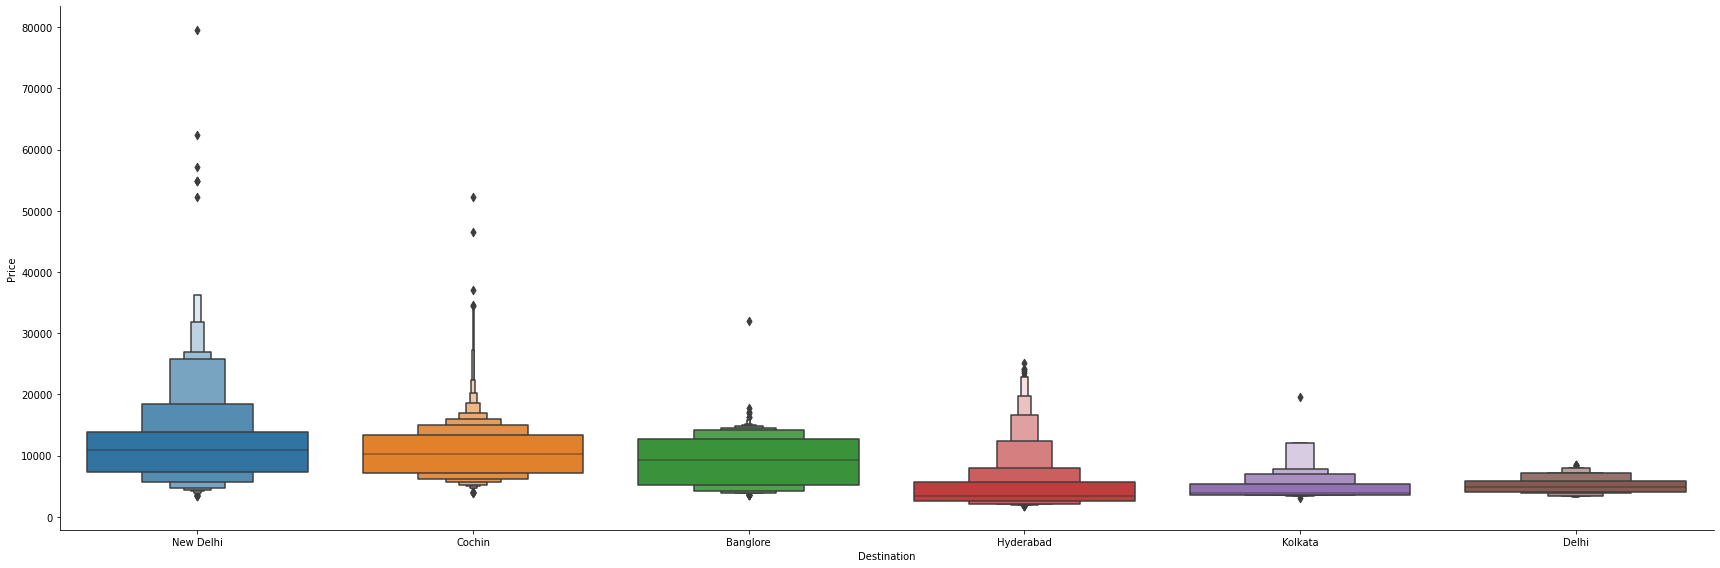

In [ ]:
sns.catplot(y = "Price", x = "Destination", data = d.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

Plotting Heatmap

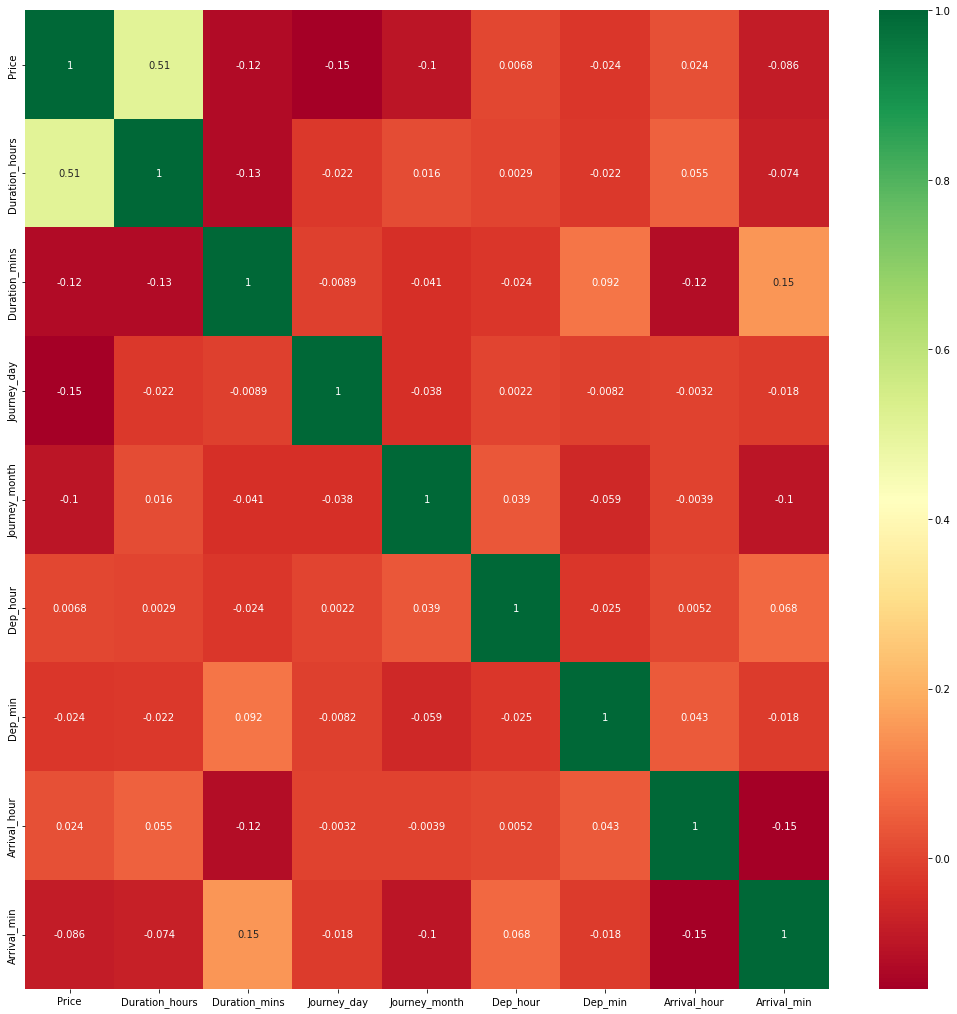

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(d.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
d.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
d

,Airline,Source,Destination,Route,Total_Stops,Price,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,4,45,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,4107,2,30,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,0,4145,2,35,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,7229,3,0,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,12648,2,40,1,3,11,30,14,10


Expanding Dataset

In [ ]:
Airline = d[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
source = d[["Source"]]
source = pd.get_dummies(source, drop_first= True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
destination = d[["Destination"]]
destination = pd.get_dummies(destination, drop_first = True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
d = pd.concat([d, Airline, source, destination], axis = 1)
d

,Airline,Source,Destination,Route,Total_Stops,Price,Duration_hours,Duration_mins,Journey_day,Journey_month,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,2,50,24,3,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,7,25,1,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,19,0,9,6,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,5,25,12,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,4,45,1,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,4107,2,30,9,4,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,CCU → BLR,0,4145,2,35,27,4,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,7229,3,0,27,4,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,12648,2,40,1,3,...,0,0,0,0,0,0,0,0,0,1


Dropping columns

In [ ]:
d.drop(['Route',"Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
d.columns

Index(['Total_Stops', 'Price', 'Duration_hours', 'Duration_mins',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
d.isnull().sum()

Total_Stops                                  0
Price                                        0
Duration_hours                               0
Duration_mins                                0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

**Splitting**

In [ ]:
x = d.drop('Price',axis = 1)
y = d['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 76)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(8011, 29) (8011,)
(2671, 29) (2671,)


Model Training

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train, y_train)
joblib.dump(knn, "Price_knn.pkl")
y_pred_knn = knn.predict(x_test)
r2score_knn = r2_score(y_pred_knn, y_test)
print('R2 score: ',r2score_knn)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

R2 score:  0.36419776101229306
RMSE:  2992.53297192399


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)
r2score_dtr = r2_score(y_pred_dtr, y_test)
joblib.dump(dtr, "Price_dtr.pkl")
print('R2 score: ',r2score_dtr)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr)))

R2 score:  0.7094898407444845
RMSE:  2464.0673671921923


In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
r2score = metrics.r2_score(y_pred, y_test)
print('R2 score: ',r2score)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score:  0.757835851713854
RMSE:  2098.022708221094


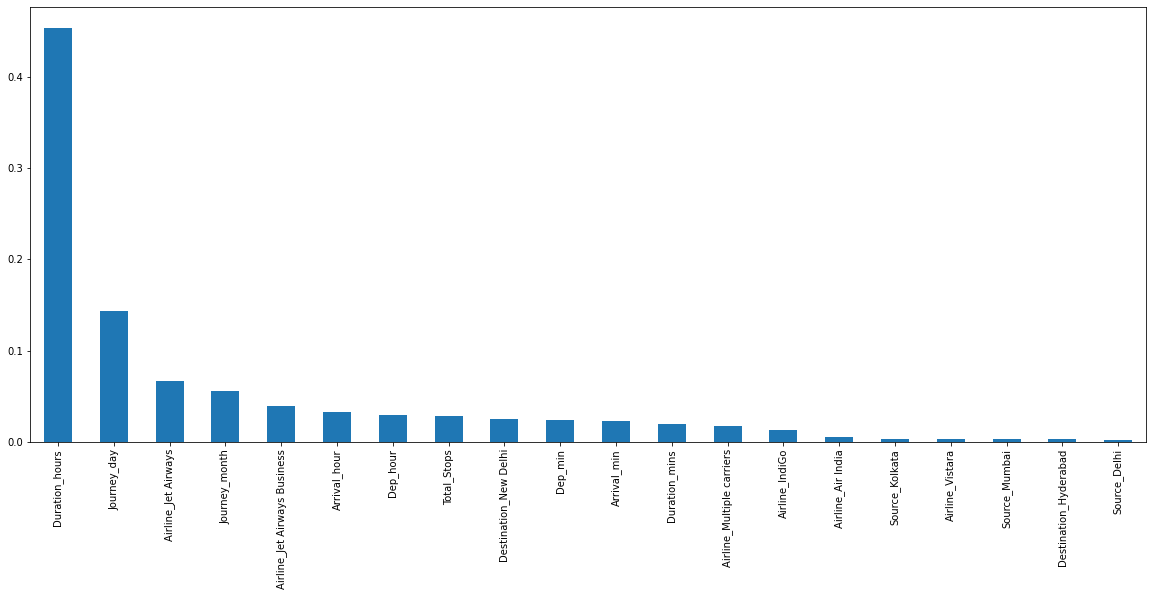

In [ ]:
plt.figure(figsize = (20,8))
feat_importances = pd.Series(rfr.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

Hyperparameter Tuning

In [ ]:
md = np.linspace(2,20,18,dtype = int)
acc_md = []
for i in md:
  model_rfr_md = RandomForestRegressor(random_state = 58,max_depth = i)
  model_rfr_md.fit(x_train,y_train)
  pred_rfr = model_rfr_md.predict(x_test)
  r2_rfr =r2_score(y_test,pred_rfr)
  acc_md.append(r2_rfr)
  print(r2_rfr)

0.46787057557365086
0.5267413068024069
0.6133641790022206
0.6756429553849215
0.7168295353203682
0.7465181836905372
0.7705462837346326
0.7897399975532976
0.8027220354488835
0.809879103849126
0.8143855225912875
0.8148738570908253
0.8141406729950397
0.8111339219137896
0.8067855566833553
0.8029505231148995
0.8003019353621663
0.7944727873615888


In [ ]:
md_final = md[acc_md.index(np.max(acc_md))]
md_final

13

In [ ]:
ne = np.linspace(2,100,98,dtype = int)
acc_ne = []
for i in ne:
  model_rfr = RandomForestRegressor(random_state = 58,max_depth = 13, n_estimators = i)
  model_rfr.fit(x_train,y_train)
  pred_rfr = model_rfr.predict(x_test)
  r2_rfr =r2_score(y_test,pred_rfr)
  acc_ne.append(r2_rfr)
nest_final = ne[acc_ne.index(np.max(acc_ne))]
nest_final

35

In [ ]:
np.max(acc_ne)

0.8271887341691041

Best Model Training

In [ ]:
model_rfr = RandomForestRegressor(random_state = 78,max_depth = 13,n_estimators = 35)
model_rfr.fit(x_train, y_train)
y_pred = model_rfr.predict(x_test)
r2score = r2_score(y_test,y_pred)
print('R2 score: ',r2score)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

R2 score:  0.8249157275387686
RMSE:  1981.7820553103177


# Pipeline

In [ ]:
class pipeline():

  def __init__(self,dataset,model="RFC"):
    self.X = dataset.drop('Price',axis=1)
    self.y = dataset['Price']
  
  def load_file(self,filename):
    infile = open(filename,'rb')
    model = pickle.load(infile)
    infile.close()
    return model

  def use_model(self,model):
    if model == "DTR":
      self.dtr = self.load_file('Price_dtr.pkl')
      self.pred = self.dtr.predict(self.X)
    if model == "KNN":
      self.knn = self.load_file('Price_knn.pkl')
      self.pred = cnn.predict(self.X)
    if model == "RFR":
      self.rfc = self.load_file('Price_rfc.pkl')
      self.pred = self.rfc.predict(self.X)    

  def get_metrics(self,model):
    if model == "DTR":
      print("The R2-Score using ",model," is: ",r2_score(y_true=y, y_pred=self.pred))
      print("The MSE using ",model," is: ",sqrt(mean_squared_error(y, self.pred)))
    if model == "KNN":
      print("The R2-Score using ",model," is: ",r2_score(y_true=y, y_pred=self.pred))
      print("The MSE using ",model," is: ",sqrt(mean_squared_error(y, self.pred)))
    if model == "RFR":
      print("The R2-Score using ",model," is: ",r2_score(y_true=y, y_pred=self.pred))
      print("The MSE using ",model," is: ",sqrt(mean_squared_error(y, self.pred)))
    
  
  def run_pipeline(self,model):
    print("model is running")
    self.use_model(model)
    print("getting metrics")
    self.get_metrics()

In [ ]:
x = pipeline(d)
x.run_pipeline(model)